In [1]:
# 구글 드라이브 연동
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [2]:
%cd /content/gdrive/My\ Drive/YOLO
!ls

/content/gdrive/My Drive/YOLO
darknet  input_a.mp4  input_a_short.mp4  output_longx1_yolofull.avi  YOLO.ipynb


In [3]:
# Pretrained 되어있는 모델을 다운로드 해보겠습니다.

!git clone https://github.com/pjreddie/darknet

fatal: destination path 'darknet' already exists and is not an empty directory.


In [4]:
 # darknet 폴더로 이동합니다.
%cd /content/gdrive/My\ Drive/YOLO/darknet

/content/gdrive/My Drive/YOLO/darknet


In [5]:
# 파일을 Make합니다.. 오래걸릴거에요
!make
!ls

make: Nothing to be done for 'all'.
backup	  libdarknet.a	 LICENSE.meta	  python	       yolov3.weights
cfg	  libdarknet.so  LICENSE.mit	  README.md	       yolov3.weights.1
darknet   LICENSE	 LICENSE.v1	  results	       yolov3.weights.2
data	  LICENSE.fuck	 Makefile	  scripts
examples  LICENSE.gen	 obj		  src
include   LICENSE.gpl	 predictions.jpg  yolov3-tiny.weights


In [6]:
# pretrained 된 weight를 받아보겠습니다.
!wget https://pjreddie.com/media/files/yolov3.weights

--2019-12-10 14:57:43--  https://pjreddie.com/media/files/yolov3.weights
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 248007048 (237M) [application/octet-stream]
Saving to: ‘yolov3.weights.3’

yolov3.weights.3    100%[===================>] 236.52M  75.2MB/s    in 3.1s    

2019-12-10 14:57:47 (75.2 MB/s) - ‘yolov3.weights.3’ saved [248007048/248007048]



In [7]:
# 실행시켜서 YOLO를 돌려봅시다!
!./darknet detect cfg/yolov3.cfg yolov3.weights data/kite.jpg

# 결과는 darknet 폴더에 prediction.png로 저장됩니다.
# 위 코드에 data/dog.jpg를 아래 중 하나로 바꾸어 실행시켜보세요!
### data/eagle.jpg
### data/person.jpg
### data/kite.jpg 

/bin/bash: ./darknet: Permission denied


In [8]:
## 기다리기가 .. 힘듭니다.
## 입력창에 파일의 경로를 입력해주세요 ... 
## data/dog.jpg 정도..
## 하나의 결과가 생성되면 prediction.png에 저장이 됩니다.
!./darknet detect cfg/yolov3.cfg yolov3.weights

/bin/bash: ./darknet: Permission denied


In [9]:
## 설명드린 바와 같이, 검출되는 이미지의 threshold를 조정할 수 있습니다.
## 아래와 같이 말이죠.
## 엄청나게 오래 걸립니다 ...
## 왜냐하면, 모든 cell에 대해서 다 검출이 되기 때문이죠.. 
## 끔찍합니다.
!./darknet detect cfg/yolov3.cfg yolov3.weights data/dog.jpg -thresh 0

/bin/bash: ./darknet: Permission denied


In [10]:
## YOLO는 너무 무겁습니다.
## 가벼운 뭔가가 필요합니다.
## YOLOv3-Tiny를 받아보겠습니다.
!wget https://pjreddie.com/media/files/yolov3-tiny.weights

--2019-12-10 14:59:10--  https://pjreddie.com/media/files/yolov3-tiny.weights
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 35434956 (34M) [application/octet-stream]
Saving to: ‘yolov3-tiny.weights.1’

yolov3-tiny.weights 100%[===================>]  33.79M  54.3MB/s    in 0.6s    

2019-12-10 14:59:11 (54.3 MB/s) - ‘yolov3-tiny.weights.1’ saved [35434956/35434956]



In [11]:
## YOLOv3 Tiny를 실행시켜봅시다.

!./darknet detect cfg/yolov3-tiny.cfg yolov3-tiny.weights data/dog.jpg -out other.jpg

/bin/bash: ./darknet: Permission denied


In [12]:
!./darknet detector cfg/coco.data cfg/yolov3.cfg yolov3.weights ../input_a_short.mp4 -ext_output test_001.mp4

/bin/bash: ./darknet: Permission denied


In [13]:
## 하지만 .. 이래서는 영 .. 문제가 많습니다.
## 이런식으로 실행하는 것도 귀찮습니다 ..
## 물론 -out으로 출력파일을 바꿔줄수는 있지만 .. 여러가지 .. 참 커스터 마이징을 하기 어렵습니다.. 
## 다행히, 어떤 감사한 분께서, 이 파일들을 전부 파이선으로 convert해주셨습니다.
## 사용해 보겠습니다.
## URL https://github.com/ayooshkathuria/YOLO_v3_tutorial_from_scratch
### 본 사이트는 처음부터 .. YOLOv3를 구현해보자는 사이트입니다.
### 공부하기에 매우 좋은 사이트입니다!

%cd /content/gdrive/My\ Drive/YOLO
!git clone https://github.com/ayooshkathuria/YOLO_v3_tutorial_from_scratch

/content/gdrive/My Drive/YOLO
Cloning into 'YOLO_v3_tutorial_from_scratch'...
remote: Enumerating objects: 95, done.
remote: Total 95 (delta 0), reused 0 (delta 0), pack-reused 95
Unpacking objects: 100% (95/95), done.


In [14]:
## 경로를 바꿔주고 .. 잠시 폴더를 탐색해보시죠 .. 훨씬 깔끔하고 예제도 많습니다!!
%cd /content/gdrive/My\ Drive/YOLO/YOLO_v3_tutorial_from_scratch
#!wget https://pjreddie.com/media/files/yolov3.weights

/content/gdrive/My Drive/YOLO/YOLO_v3_tutorial_from_scratch


In [15]:
## 우리 .. 댕댕이를 한번 다시 돌려보겠습니다..
!python detect.py --images ./imgs/dog.jpg --det my_result

Loading network.....
Traceback (most recent call last):
  File "detect.py", line 64, in <module>
    model.load_weights(args.weightsfile)
  File "/content/gdrive/My Drive/YOLO/YOLO_v3_tutorial_from_scratch/darknet.py", line 232, in load_weights
    fp = open(weightfile, "rb")
FileNotFoundError: [Errno 2] No such file or directory: 'yolov3.weights'


In [16]:
## VIDEO를 돌려보겠습니다.. 아쉽게도 -det옵션은 없습니다 .. 
!python video.py --video ../input_a.mp4

##### 안됩니다!!!!!
##### Docker를 올려서 해결하는 방법이 있습니다.
##### 다만 .. Colab에서는 상당히 해결방법이 까다롭기 때문에 .. 추후 Linux 시스템에서 해보시길 추천드립니다.
##### 특히 GUI가 지원되는 환경에서 해보시길 바랍니다.

Loading network.....
Traceback (most recent call last):
  File "video.py", line 57, in <module>
    model.load_weights(args.weightsfile)
  File "/content/gdrive/My Drive/YOLO/YOLO_v3_tutorial_from_scratch/darknet.py", line 232, in load_weights
    fp = open(weightfile, "rb")
FileNotFoundError: [Errno 2] No such file or directory: 'yolov3.weights'


In [0]:
import numpy as np
import time
import cv2

In [18]:
%cd /content/gdrive/My\ Drive/YOLO/darknet
#Load YOLO
net = cv2.dnn.readNet("yolov3.weights","./cfg/yolov3.cfg") # Original yolov3
#net = cv2.dnn.readNet("yolov3-tiny.weights","./cfg/yolov3-tiny.cfg") #Tiny Yolo
classes = []
with open("./data/coco.names","r") as f:
    classes = [line.strip() for line in f.readlines()]

/content/gdrive/My Drive/YOLO/darknet


In [0]:
layer_names = net.getLayerNames()
outputlayers = [layer_names[i[0] - 1] for i in net.getUnconnectedOutLayers()]

In [0]:
colors= np.random.uniform(0,255,size=(len(classes),3))

In [21]:
!pwd

/content/gdrive/My Drive/YOLO/darknet


In [29]:
#loading image
cap=cv2.VideoCapture("/content/gdrive/My Drive/YOLO/input_a.mp4") #0 for 1st webcam
font = cv2.FONT_HERSHEY_PLAIN
starting_time= time.time()

width, height = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH)), int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
channels = 3
fps = cap.get(cv2.CAP_PROP_FPS)

# can't write out mp4, so try to write into an AVI file
video_writer = cv2.VideoWriter("/content/gdrive/My Drive/YOLO/output_longx1_yolofull.avi", cv2.VideoWriter_fourcc(*'MJPG'), fps, (width, height))

frame_id = 0

while True:
    ret,frame= cap.read() # 
    frame_id+=1
    
    if not ret:
      break
    
    #height,width,channels = frame.shape
    #detecting objects
    blob = cv2.dnn.blobFromImage(frame,0.00392,(320,320),(0,0,0),True,crop=False) #reduce 416 to 320    

        
    net.setInput(blob)
    outs = net.forward(outputlayers)
    print(outs[1])


    #Showing info on screen/ get confidence score of algorithm in detecting an object in blob
    class_ids=[]
    confidences=[]
    boxes=[]
    for out in outs:
        for detection in out:
            scores = detection[5:]
            class_id = np.argmax(scores)
            confidence = scores[class_id]
            if confidence > 0.3:
                #onject detected
                center_x= int(detection[0]*width)
                center_y= int(detection[1]*height)
                w = int(detection[2]*width)
                h = int(detection[3]*height)

                #cv2.circle(img,(center_x,center_y),10,(0,255,0),2)
                #rectangle co-ordinaters
                x=int(center_x - w/2)
                y=int(center_y - h/2)
                #cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,0),2)

                boxes.append([x,y,w,h]) #put all rectangle areas
                confidences.append(float(confidence)) #how confidence was that object detected and show that percentage
                class_ids.append(class_id) #name of the object tha was detected

    indexes = cv2.dnn.NMSBoxes(boxes,confidences,0.4,0.6)


    for i in range(len(boxes)):
        if i in indexes:
            x,y,w,h = boxes[i]
            label = str(classes[class_ids[i]])
            confidence= confidences[i]
            color = colors[class_ids[i]]
            cv2.rectangle(frame,(x,y),(x+w,y+h),color,2)
            cv2.putText(frame,label+" "+str(round(confidence,2)),(x,y+30),font,1,(255,255,255),2)
#     key = cv2.waitKey(1) #wait 1ms the loop will start again and we will process the next frame
    
#     if key == 27: #esc key stops the process
#         break;
    
cap.release()    
cv2.destroyAllWindows()


[[0.02612058 0.0298405  0.06924458 ... 0.         0.         0.        ]
 [0.01732453 0.02497732 0.44662485 ... 0.         0.         0.        ]
 [0.02393642 0.02524184 0.09712112 ... 0.         0.         0.        ]
 ...
 [0.96404886 0.97432125 0.05849629 ... 0.         0.         0.        ]
 [0.9806608  0.97489756 0.48023733 ... 0.         0.         0.        ]
 [0.97255534 0.97633016 0.0968722  ... 0.         0.         0.        ]]
[[0.02585034 0.02991853 0.06899656 ... 0.         0.         0.        ]
 [0.01715772 0.02496136 0.44649115 ... 0.         0.         0.        ]
 [0.02385963 0.02538005 0.09684087 ... 0.         0.         0.        ]
 ...
 [0.96406066 0.9743428  0.05849826 ... 0.         0.         0.        ]
 [0.9806771  0.97490406 0.48070627 ... 0.         0.         0.        ]
 [0.9725491  0.97632086 0.09686668 ... 0.         0.         0.        ]]
[[0.02580937 0.02992769 0.06863894 ... 0.         0.         0.        ]
 [0.01712381 0.02481594 0.4474441  ... 

KeyboardInterrupt: ignored

In [0]:
## YOLO 학습데이터 직접 만들기 .. 
## https://pgmrlsh.tistory.com/6 

## 동영상 실행 및 동영상 만들기

In [30]:
%cd /content/gdrive/My\ Drive/YOLO

import numpy as np
import cv2

/content/gdrive/My Drive/YOLO


In [0]:
# Video Load
video_sample = cv2.VideoCapture('/content/gdrive/My Drive/YOLO/input_a.mp4')

(720, 1280, 3)


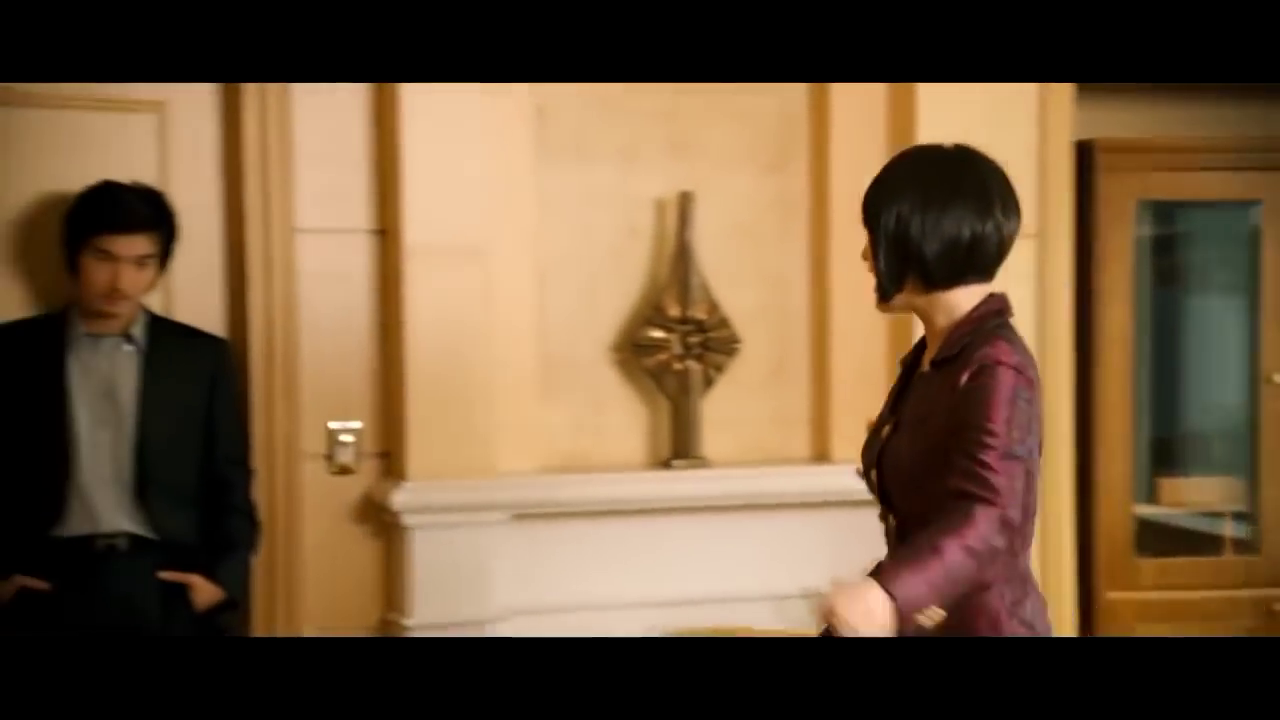

KeyboardInterrupt: ignored

In [39]:
from google.colab.patches import cv2_imshow

# frame 수를 count하기 위한 변수 설정
count_frame = 0


while(video_sample.isOpened()):
  
  count_frame += 1
  
  # 동영상 파일로 부터 이미지를 가져옴
  ret, frame = video_sample.read()
  
  # 60 프레임 단위로 열어보기
  if (count_frame % 60 == 0):
    
    # 동영상의 크기 확인
    print(frame.shape)
  
    # 화면에 이미지를 출력
    cv2_imshow(frame)

    # 입력을 받으면 .. 실행.. 그냥 확인할때 많이쓰는 편법입니다.
    input()


# 비디오를 열고 나시면, 항상 이렇게 리소스를 해제해주세요.
video_sample.release()
cv2.destroyAllWindows()

In [36]:
## 도형을 동영상으로 만들어보기

videofile1 = "./test.avi"

# 비디오 쓰기 + fourcc -> frame 압축 관련 4자리 코드
fourcc = cv2.VideoWriter_fourcc(*'DIVX')

#cv2.VideoWriter([filename, fourcc, fps, framesize[,isColor]])
out    = cv2.VideoWriter(videofile1, fourcc, 25.0, (384, 384))

blue_color = (255,0,0)
green_color = (0,255,0)
red_color = (0,0,255)
white_color = (255,255,255)

# 모두 0으로 되어있는 빈 Canvas 설정 (검은색)
img = np.zeros((384, 384, 3), np.uint8)

# 90 프레임만 만들어봅시다..
for i in range(0, 360): #Q. 몇초짜리 영상이 나올까요? 14.4초 ..
  
  # 타원을 다각형의 도형 형태로
  pt1 = cv2.ellipse2Poly((200,200), (100,160), i, 0, 360, 50)
  # 비교대상의 타원을 흰색으로 표시
  img = cv2.ellipse(img, (200,200), (100,160), 0, 0, 360, white_color, 2)
  # 이미지에 다각형의 도형을 넣기
  img = cv2.polylines(img, [pt1], False, green_color, 2)
  
  out.write(img)
  
out.release()
print("Done") 
# 구글드라이브 내 test.avi를 다운받아 실행시켜보세요!

Done


.. 만약 카메라에서 받아오셔야 한다면,
이 사이트를 참고해보세요..
https://webnautes.tistory.com/577